# Pollutions

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from src.pollution.clock_jitter import clock_jitter
from src.pollution.gaussian_noise import gaussian_noise
from src.pollution.random_delay import random_delay
from src.pollution.window_jitter import window_jitter
from src.tools.plotter import init_plots, store_sns

init_plots()

### General changes

- Using numpy array indexing instead of appending python list (speed increase)
- Computes (too much) random values all at once. This results in a major speed increase.

In [2]:
A = 5
B = 3
DELAY_AMP = 10
GAUSS_LEVEL = 8
CLOCK_VAR = 1 # 2 in the original, with random int.

WIN_CALC = 2

### Clock jitter implementation

Differences in implementation from AISY lab:
- Changed `random.randint` to `random.normal`, to better simulate a real-world process.

In [3]:
RAW_TRACES = np.array([(np.sin(np.linspace(1, 20, 2000)) * 100) for _ in range(100)], dtype=np.int8)
RAW_TRACES_MAX = np.array([(np.sin(np.linspace(1, 20, 2000)) * np.iinfo(np.int8).max) for _ in range(100)], dtype=np.int8)

WINDOW = (500, 1500)

TRACES = RAW_TRACES[:, WINDOW[0]:WINDOW[1]]
TRACES_MAX = RAW_TRACES_MAX[:, WINDOW[0]:WINDOW[1]]

Clock jitter (5): 100%|██████████| 100/100 [00:00<00:00, 1067.33it/s]


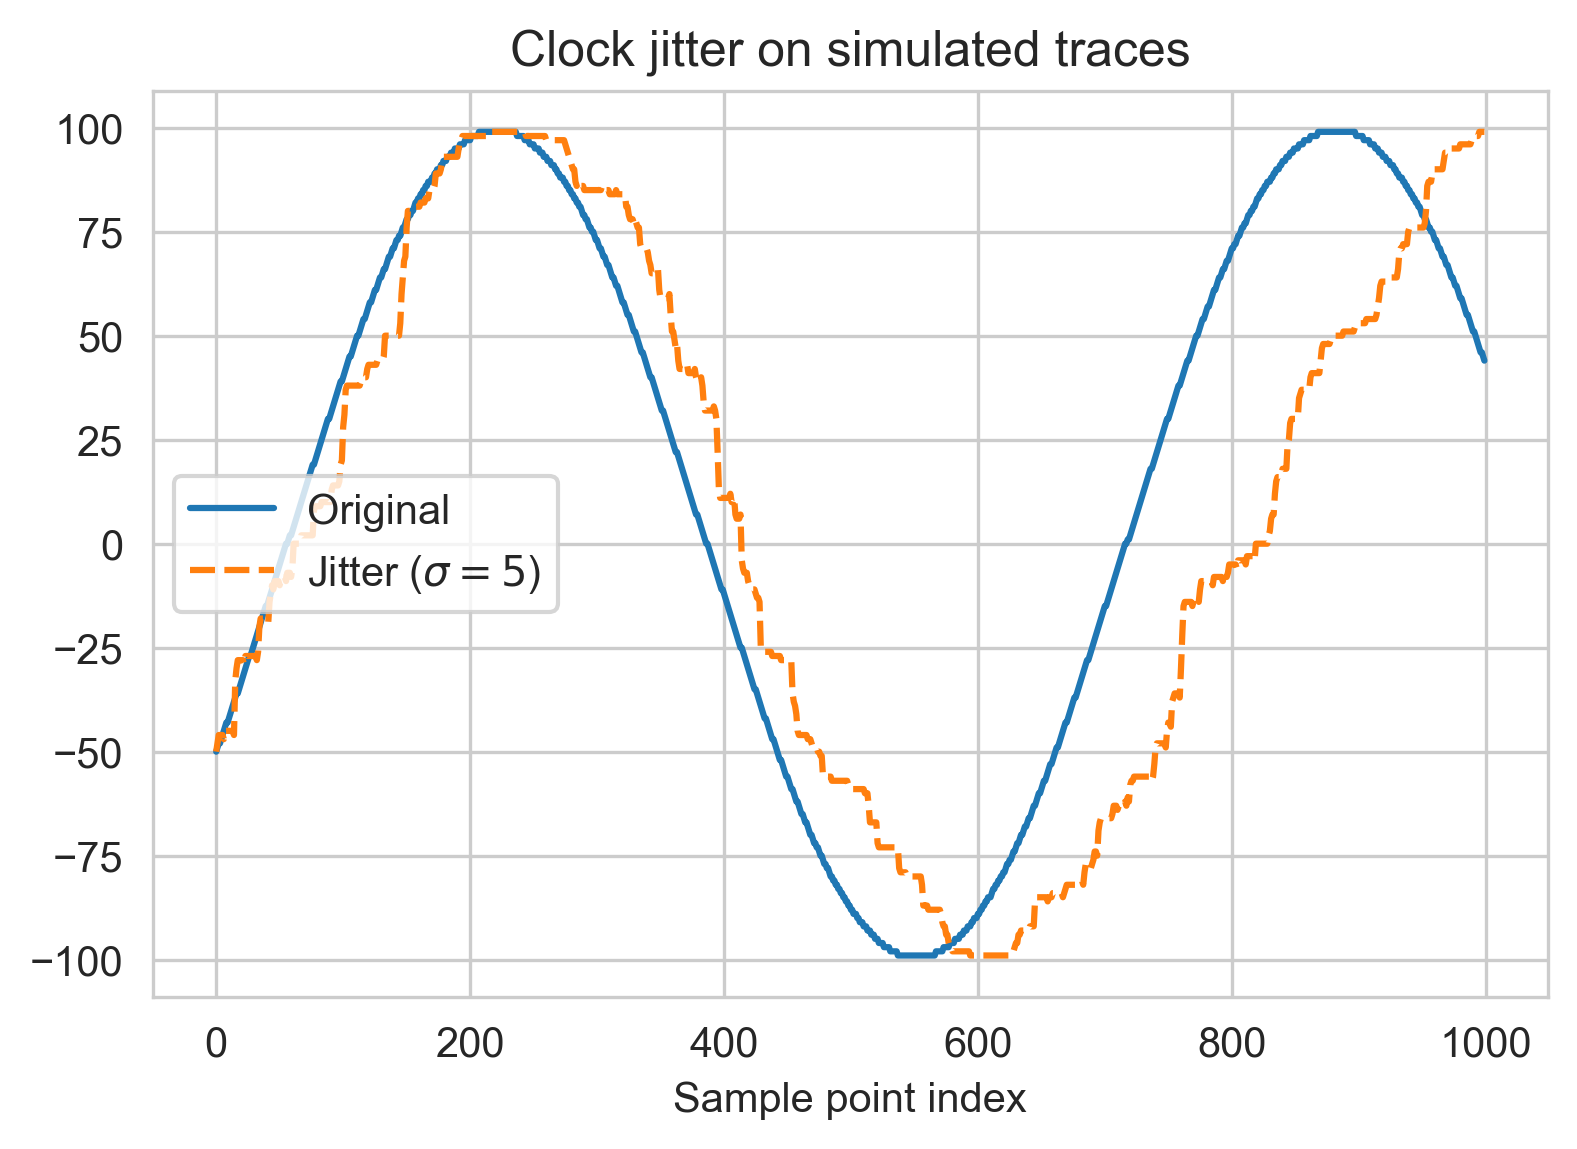

In [4]:
DEMO_CLOCK_VAR = 5
JITTER = clock_jitter(RAW_TRACES, WINDOW, DEMO_CLOCK_VAR)
G = sns.lineplot(data={"Original": TRACES[0], f"Jitter ($\sigma = {DEMO_CLOCK_VAR}$)": JITTER[0]})
G.set(title="Clock jitter on simulated traces", xlabel="Sample point index")
plt.legend(loc='center left')

store_sns(G, "pollution-jitter")

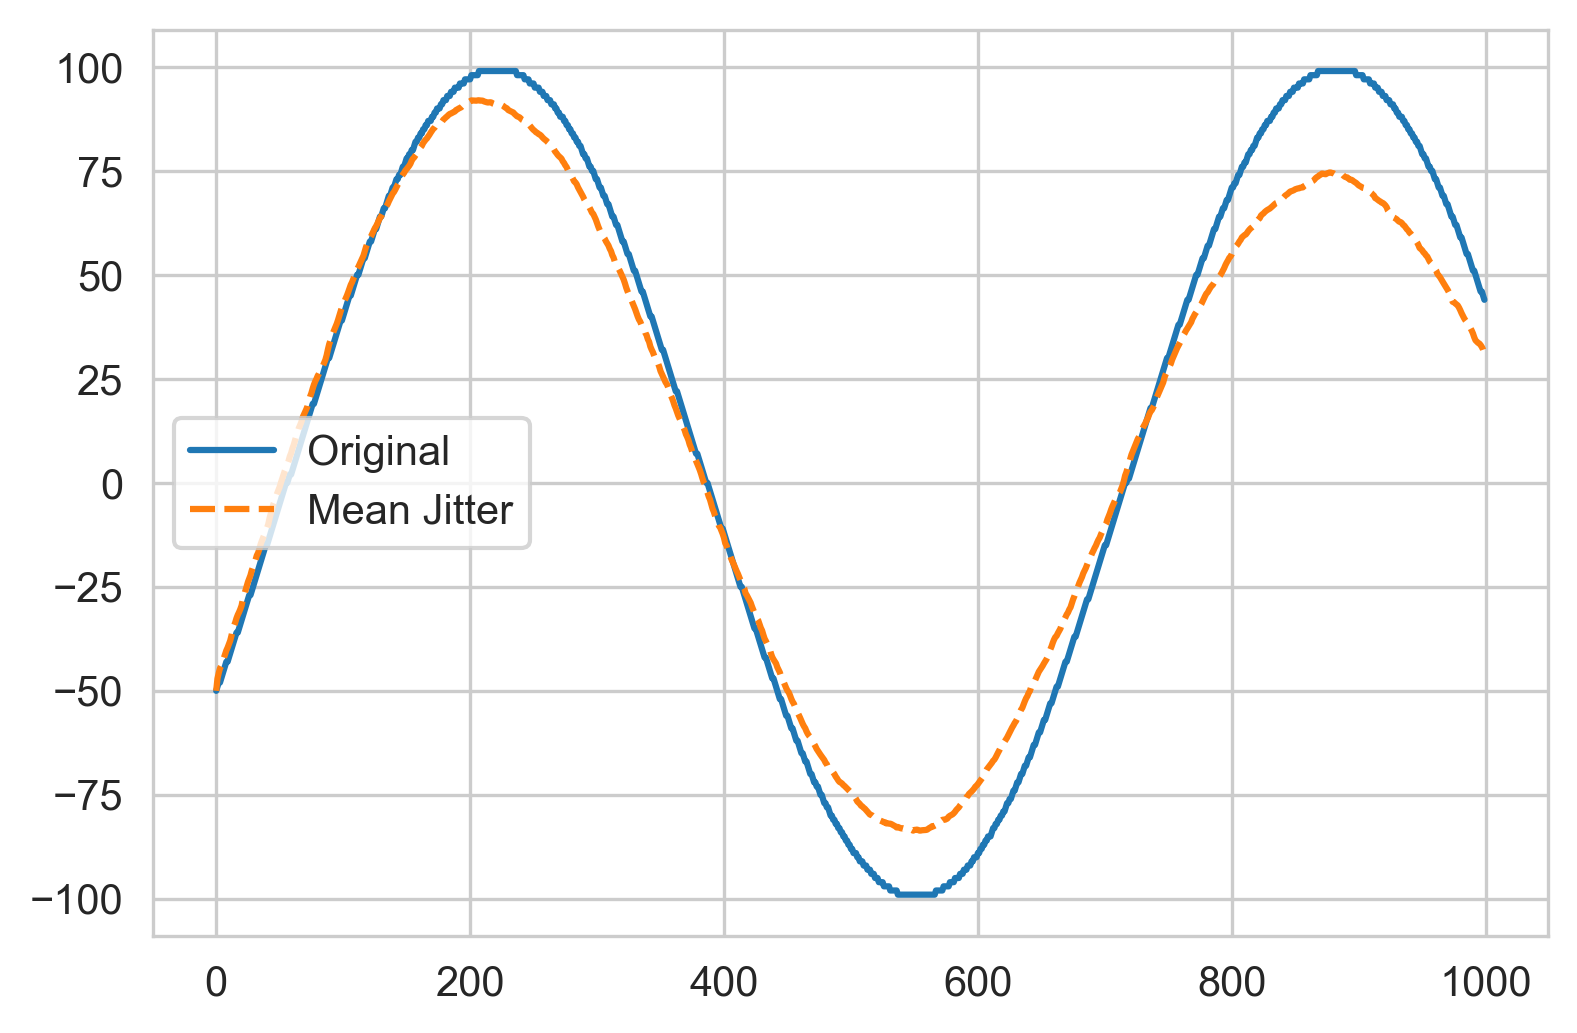

In [5]:
sns.lineplot(data={"Original": TRACES[0], "Mean Jitter": np.mean(JITTER,axis=0)})
plt.legend(loc='center left')

### Random delay implementation

Differences in implementation from AISY lab:
- Sample point value capped at 127, which is the maximum value of `np.int8`. This prevents integer overflow issues after
applying the `delay_amplitude`.
- Variable delay probability.

Random delay (0.1): 100%|██████████| 100/100 [00:00<00:00, 1854.60it/s]


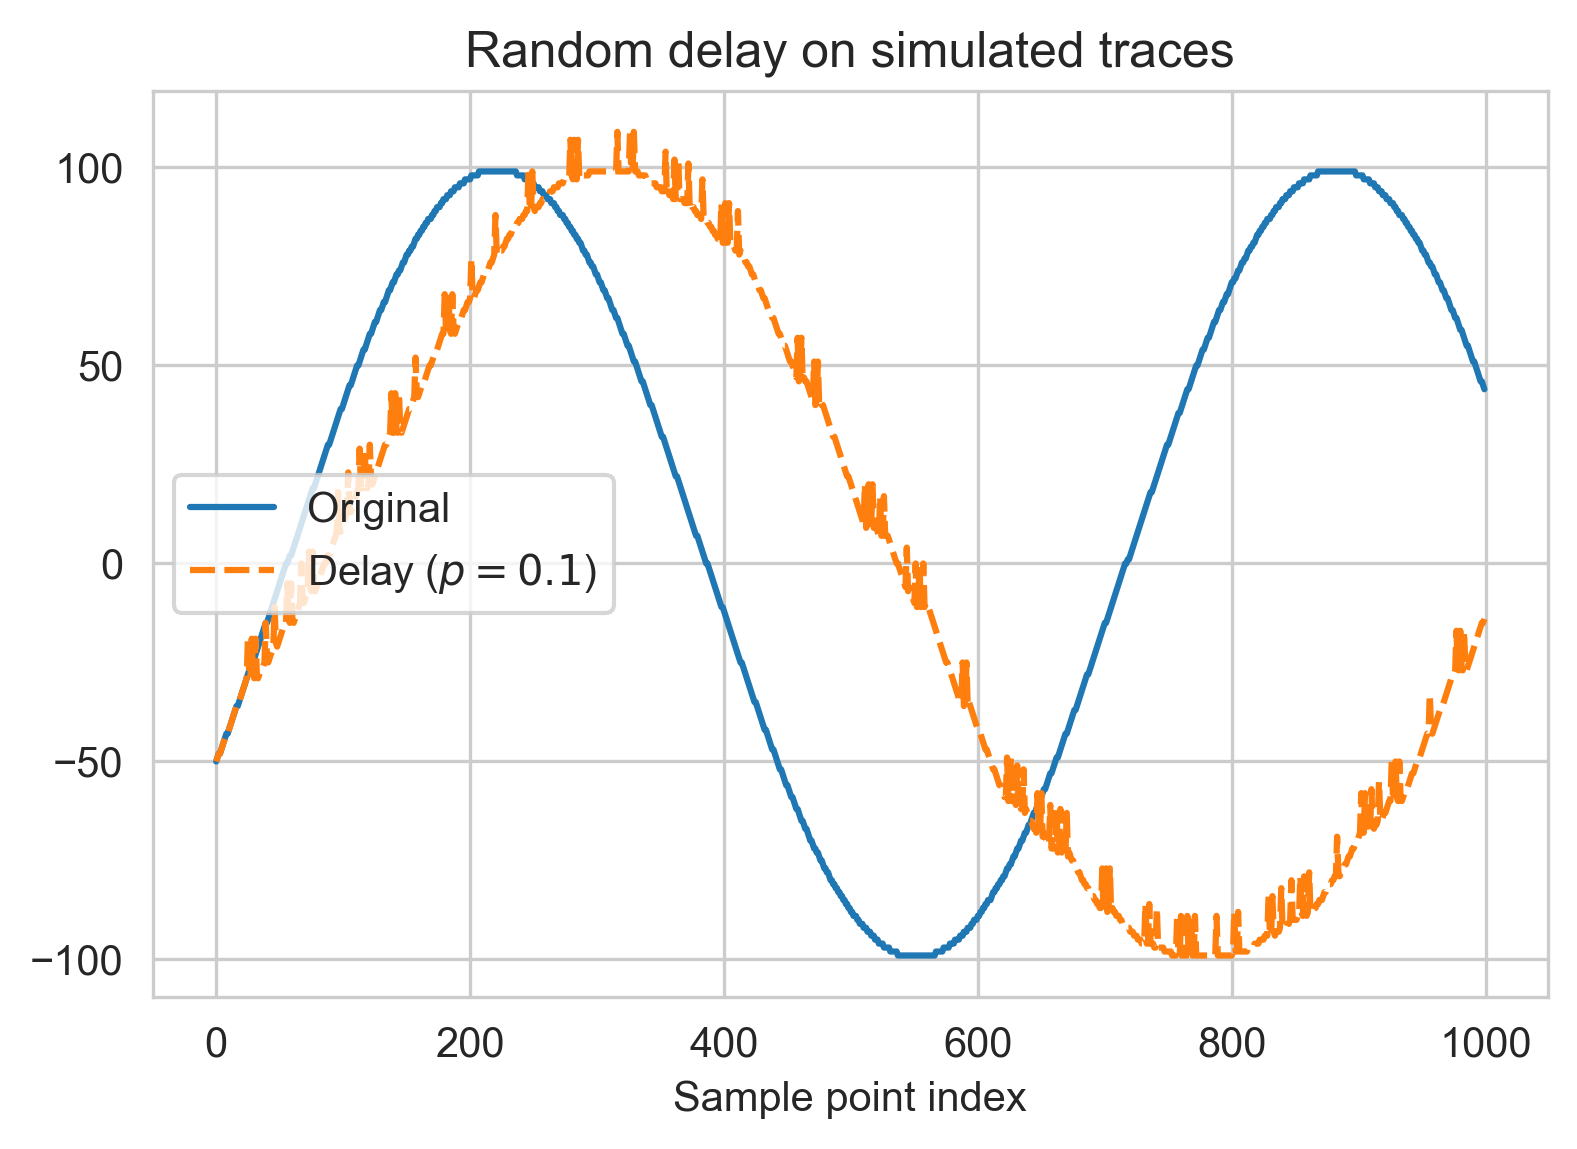

In [6]:
DELAY_PROB = .1
DELAY = random_delay(TRACES, A, B, DELAY_AMP, DELAY_PROB)
G = sns.lineplot(data={"Original": TRACES[0], f"Delay ($p ={DELAY_PROB}$)": DELAY[0]})
G.set(title="Random delay on simulated traces", xlabel="Sample point index")
plt.legend(loc='center left')

store_sns(G, "pollution-delay")

Random delay (0.1): 100%|██████████| 100/100 [00:00<00:00, 1721.91it/s]


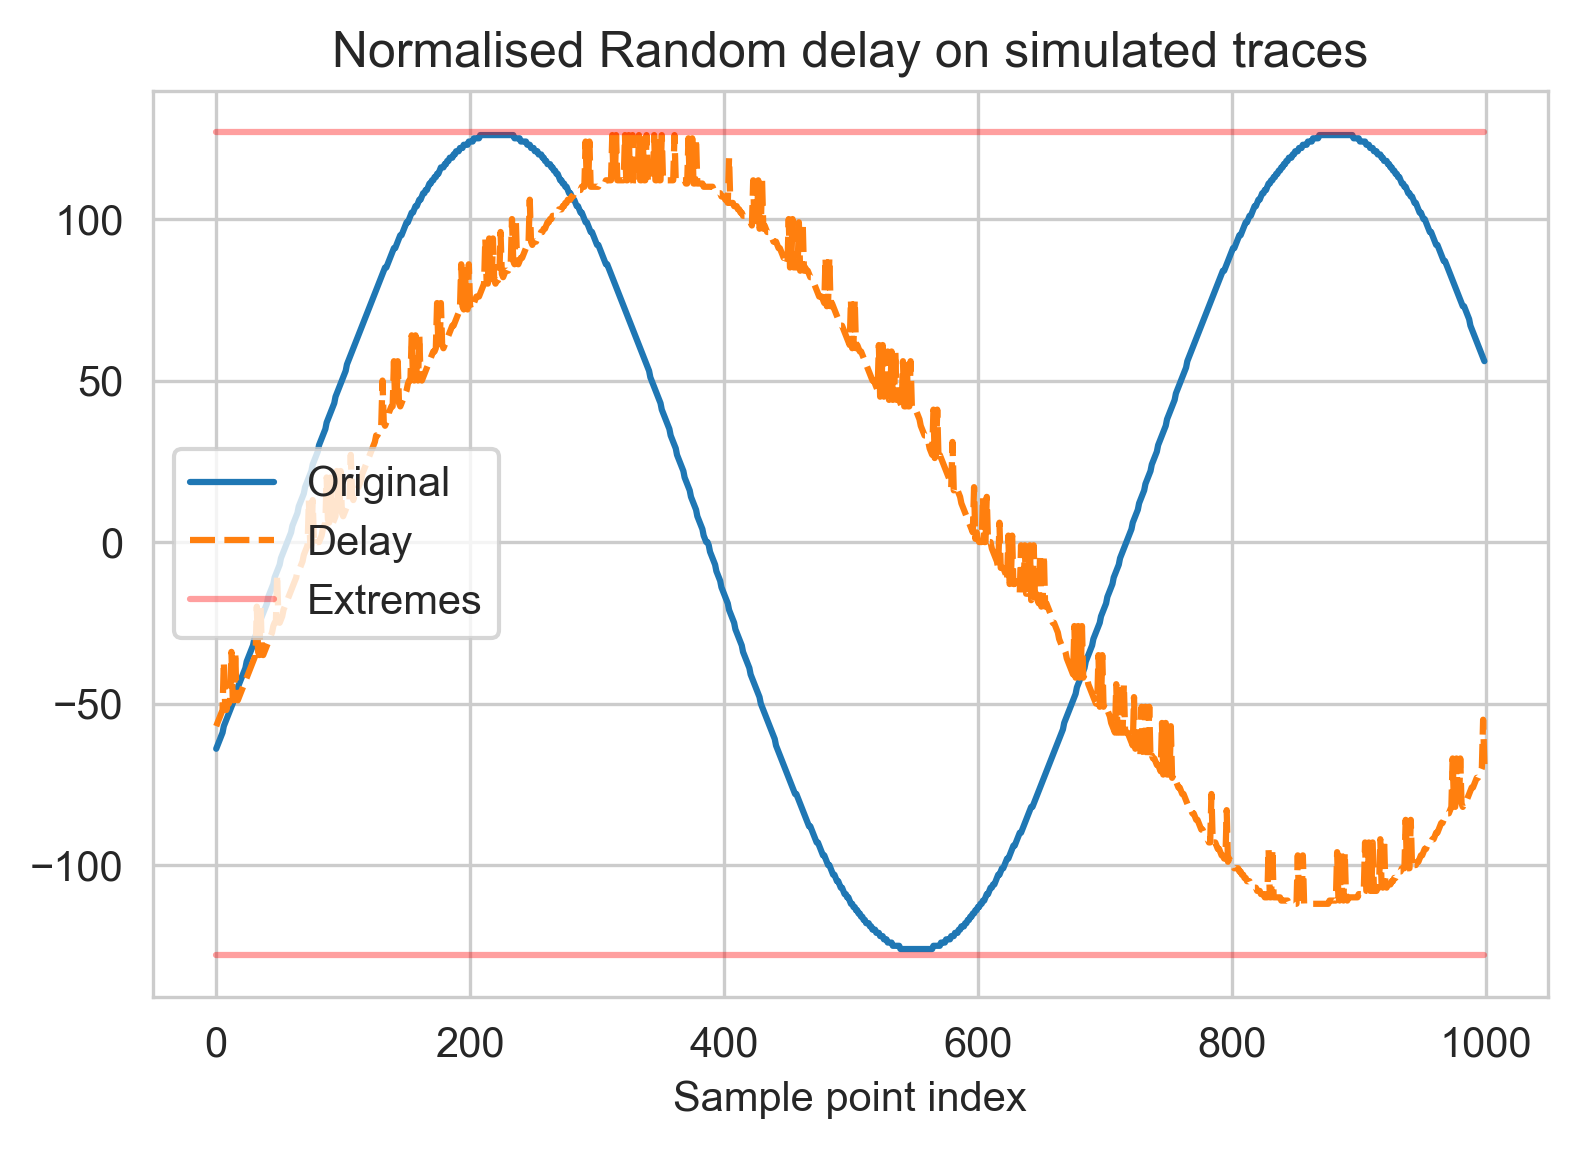

In [7]:
def plot_extremes(extreme_color = "#FF000060"):
    sns.lineplot(data={"Extremes": [127] * len(TRACES_MAX[0])}, palette=[extreme_color])
    sns.lineplot(data=[-128] * len(TRACES_MAX[0]), color=extreme_color)

DELAY_MAX = random_delay(TRACES_MAX, A, B, 16, DELAY_PROB)
G = sns.lineplot(data={"Original": TRACES_MAX[0], f"Delay": DELAY_MAX[0]})
G.set(title="Normalised Random delay on simulated traces", xlabel="Sample point index")
plot_extremes()
plt.legend(loc='center left')

store_sns(G, "pollution-delay-norm")

In [8]:
np.iinfo(np.int8).max

127

### Random delay implementation

No differences other than simplification.

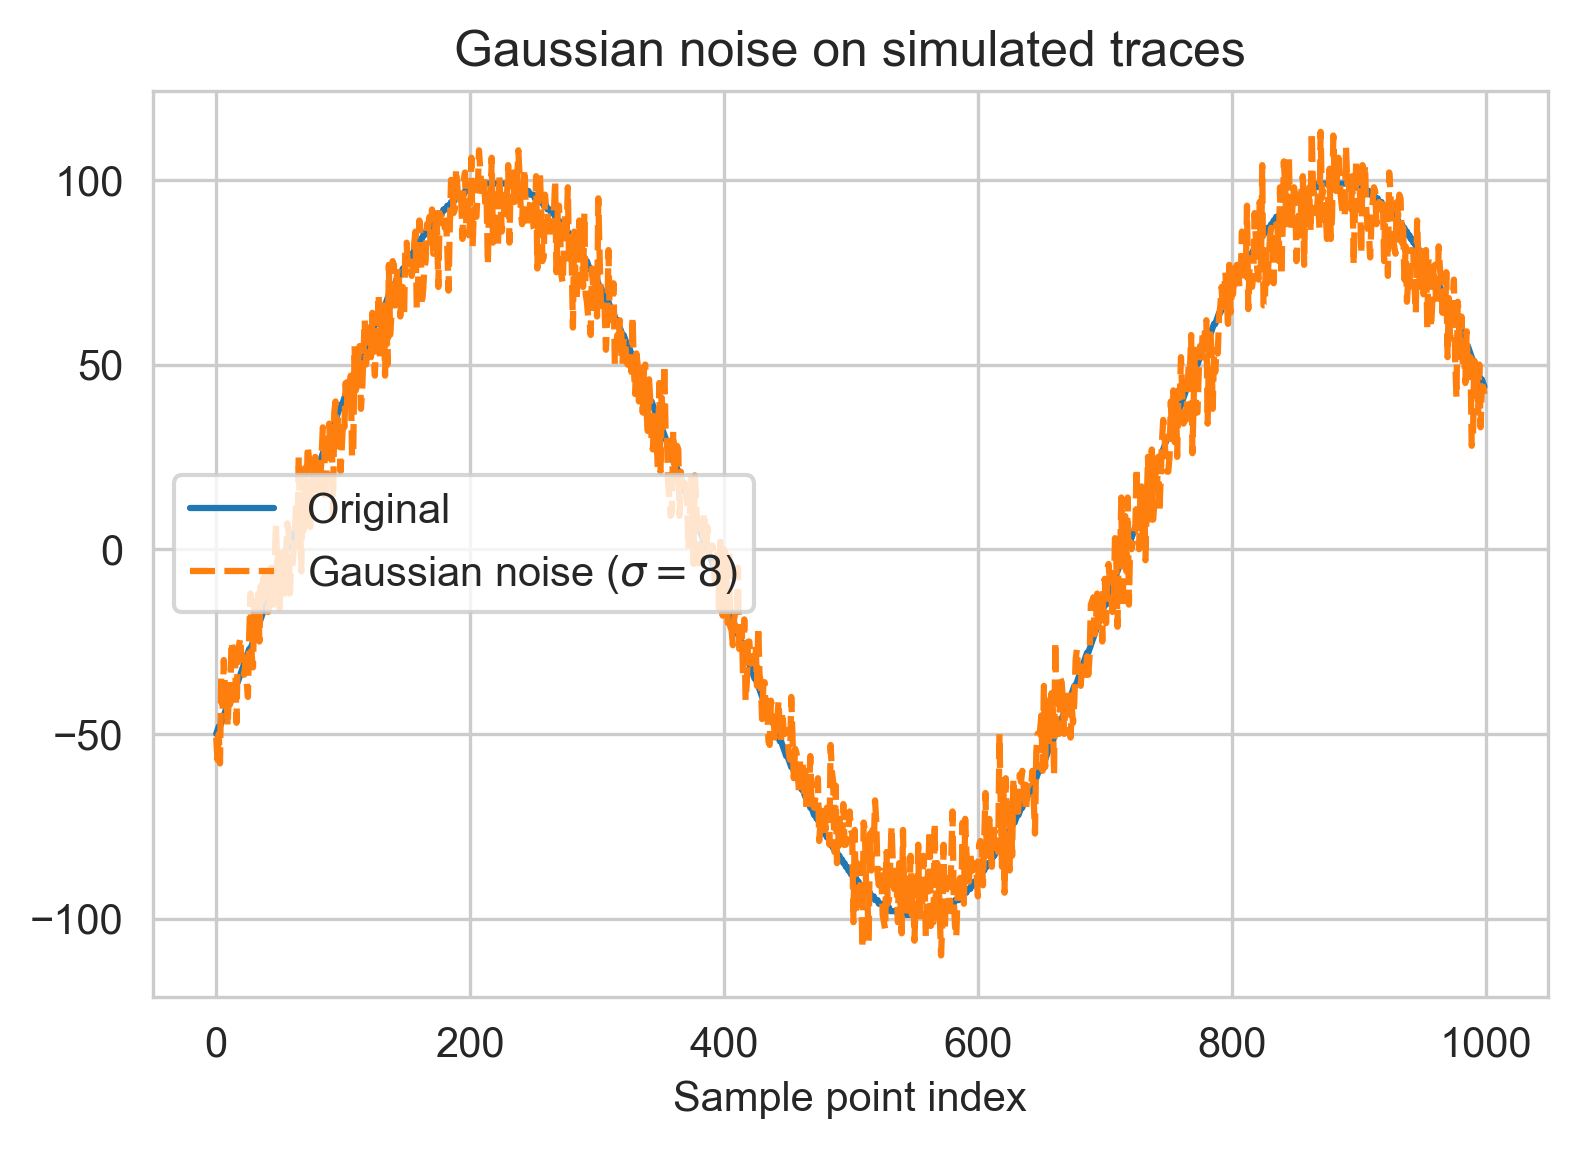

In [9]:
GAUSSIAN = gaussian_noise(TRACES, GAUSS_LEVEL)
G = sns.lineplot(data={"Original": TRACES[0], f"Gaussian noise ($\sigma = {GAUSS_LEVEL}$)": GAUSSIAN[0]})
G.set(title="Gaussian noise on simulated traces", xlabel="Sample point index")
plt.legend(loc='center left')

store_sns(G, "pollution-gauss")

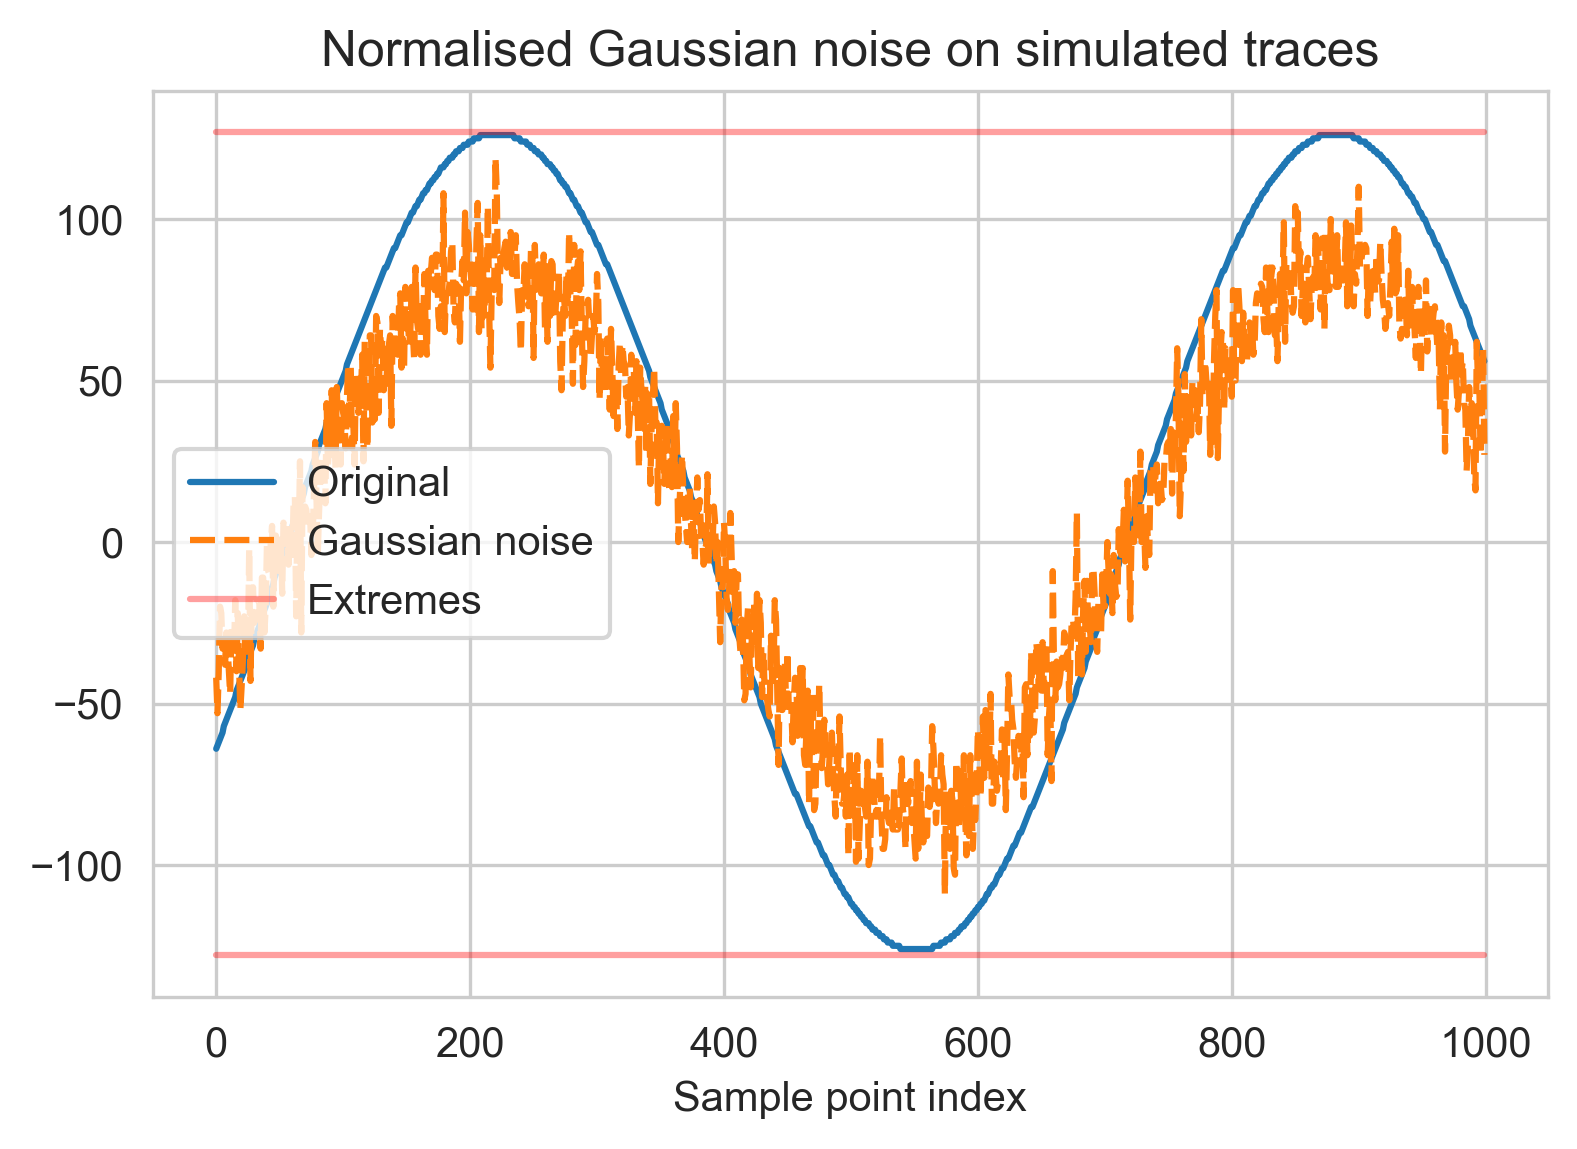

In [10]:
GAUSSIAN = gaussian_noise(TRACES_MAX, 16)
G = sns.lineplot(data={"Original": TRACES_MAX[0], f"Gaussian noise": GAUSSIAN[0]})
G.set(title="Normalised Gaussian noise on simulated traces", xlabel="Sample point index")
plot_extremes()
plt.legend(loc='center left')

store_sns(G, "pollution-gauss-norm")

### Window jitter implementation

Based on the method from ASCAD.

Window jitter (50): 100%|██████████| 100/100 [00:00<00:00, 203212.40it/s]


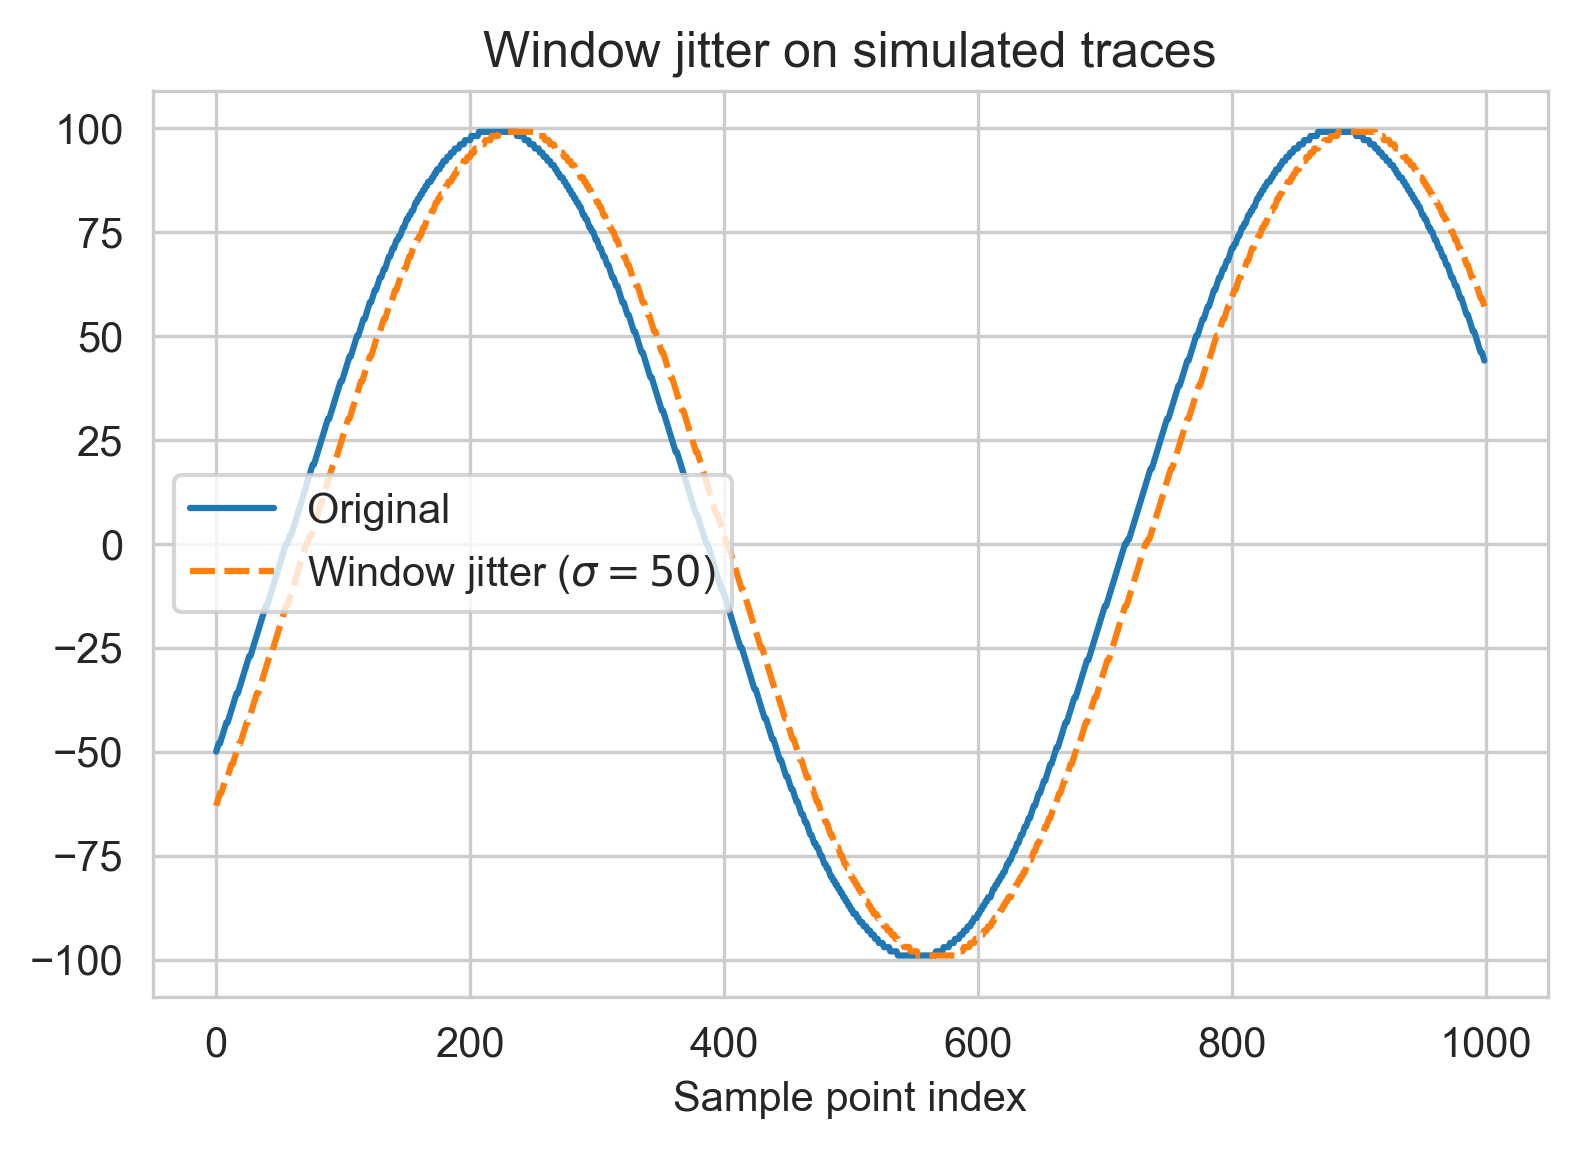

In [11]:
WINDOW_JITTER = 50

WIN_JITTER = window_jitter(RAW_TRACES, WINDOW, WINDOW_JITTER)
G = sns.lineplot(data={"Original": TRACES[0], f"Window jitter ($\sigma = {WINDOW_JITTER}$)": WIN_JITTER[0]})
G.set(title="Window jitter on simulated traces", xlabel="Sample point index")
plt.legend(loc='center left')

store_sns(G, "pollution-desync")